# DA Final project: Sleep Efficiency

# Group 

# Going Of The Rails

###  Name of students:
Roy Ashkenazi<br>
Zohar Kulp<br>
Oz Kenner<br>



<a id='top'></a>

<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/sleep-share-card.jpeg?raw=true" width="800"/>
</div>


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import matplotlib as mpl

In [68]:
url = 'https://raw.githubusercontent.com/RoidoAsh/project1/main/Sleep_Efficiency.csv'
Sleep_Efficiency = pd.read_csv(url)

In [69]:
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [70]:
Sleep_Efficiency['Smoke_stat_by_num'] = Sleep_Efficiency['Smoking status'].apply(lambda x: 1 if x == 'Yes' else 0)
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Smoke_stat_by_num
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0


In [71]:
Sleep_Efficiency.shape

(452, 16)

In [73]:
Sleep_Efficiency.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Smoke_stat_by_num'],
      dtype='object')

In [74]:
Sleep_Efficiency.dtypes

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
Smoke_stat_by_num           int64
dtype: object

In [75]:
Sleep_Efficiency.isnull().sum().sort_values()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Smoking status             0
Smoke_stat_by_num          0
Exercise frequency         6
Alcohol consumption       14
Awakenings                20
Caffeine consumption      25
dtype: int64

Text(0, 0.5, 'precenteg')

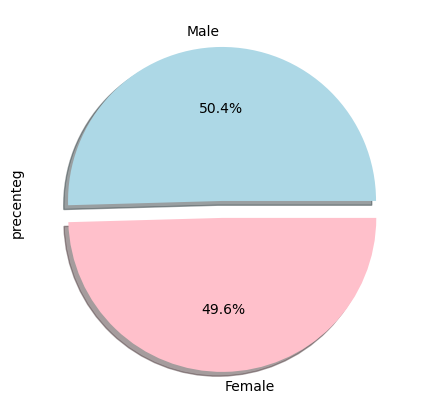

In [76]:
plt.figure(figsize=(15,5))
Sleep_Efficiency['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['lightblue', 'pink'])
plt.ylabel('precenteg')

In [77]:
Sleep_Efficiency.groupby('Gender')['Sleep duration'].mean().reset_index()

,Gender,Sleep duration
0,Female,7.504464
1,Male,7.427632


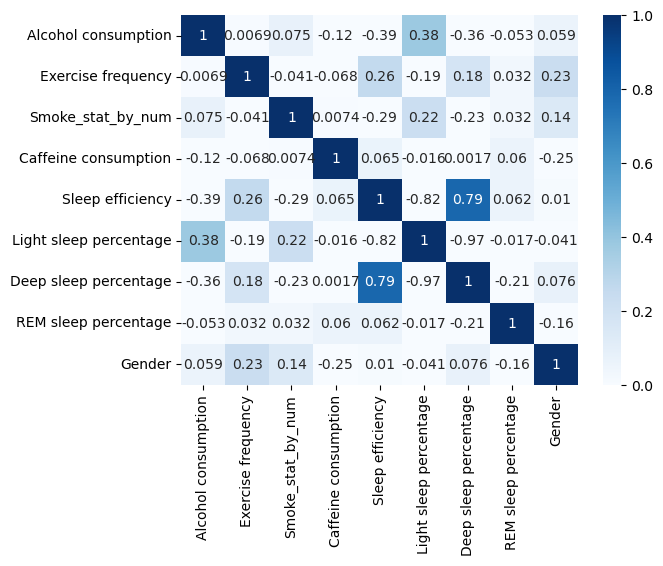

In [79]:
Sleep_Efficiency['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
features1 = ['Alcohol consumption','Exercise frequency','Smoke_stat_by_num','Caffeine consumption','Sleep efficiency','Light sleep percentage','Deep sleep percentage','REM sleep percentage','Gender']
correlation_matrix = Sleep_Efficiency[features1].corr()
sns.heatmap(correlation_matrix,vmin=0 , vmax = 1,cmap='Blues' , annot=True);

In [80]:
Sleep_Efficiency['Gender'].replace([0, 1], ['Female', 'Male'], inplace=True)

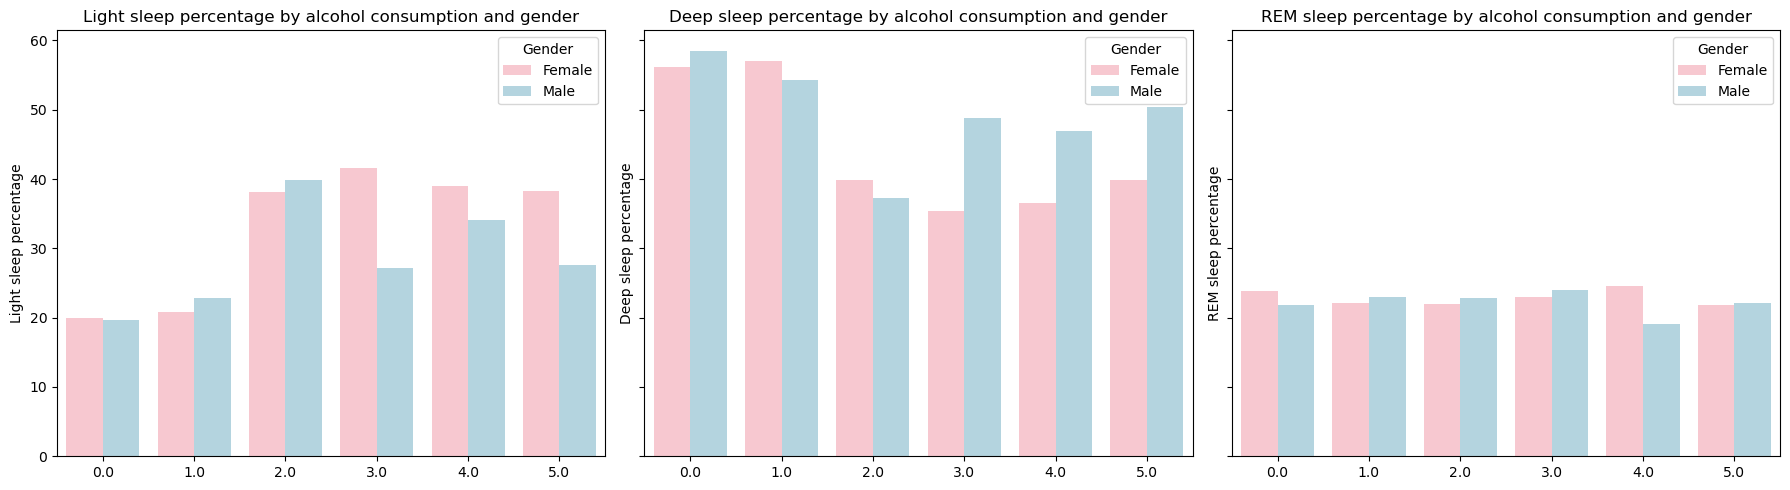

In [81]:
palette = {'Female': 'pink', 'Male': 'lightblue'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.barplot(x="Alcohol consumption", y="Light sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[0])
axes[0].set_title("Light sleep percentage by alcohol consumption and gender")
axes[0].set_xlabel("")
axes[0].set_ylabel("Light sleep percentage")

sns.barplot(x="Alcohol consumption", y="Deep sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[1])
axes[1].set_title("Deep sleep percentage by alcohol consumption and gender")
axes[1].set_xlabel("")
axes[1].set_ylabel("Deep sleep percentage")

sns.barplot(x="Alcohol consumption", y="REM sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[2])
axes[2].set_title("REM sleep percentage by alcohol consumption and gender")
axes[2].set_xlabel("")
axes[2].set_ylabel("REM sleep percentage")

plt.tight_layout()
plt.show()


In [53]:
filtered_Eff = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'] > 3]
average_sleep_quality = filtered_Eff.groupby('Gender')['Sleep efficiency'].mean().reset_index()
average_sleep_quality.columns = ['Gender', 'Average Sleep Quality']
average_sleep_quality

,Gender,Average Sleep Quality
0,Female,0.661250
1,Male,0.712759


אפשר לראות את השפעת אלכוהול על כל אחד משלבי השינה לפי מגדר.   אפשר לראות שנשים שצורכות למעלה מ 90 מ"מ, 24 שעות לפני שעת השינה שלהם ישהו במהלך  זמן השינה הכולל שלהן יותר בשלב השינה הקל מאשר גברים שישהו יותר זמן בשלב השינה העמוקה דבר שמשפיע בסופו של דבר על איכות השינה   